<a href="https://colab.research.google.com/github/rafabarros95/ML-DL/blob/main/Forecasting_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/monthly-beer-production-in-austr.csv', index_col= 'Month', parse_dates=True)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


<Axes: xlabel='Month'>

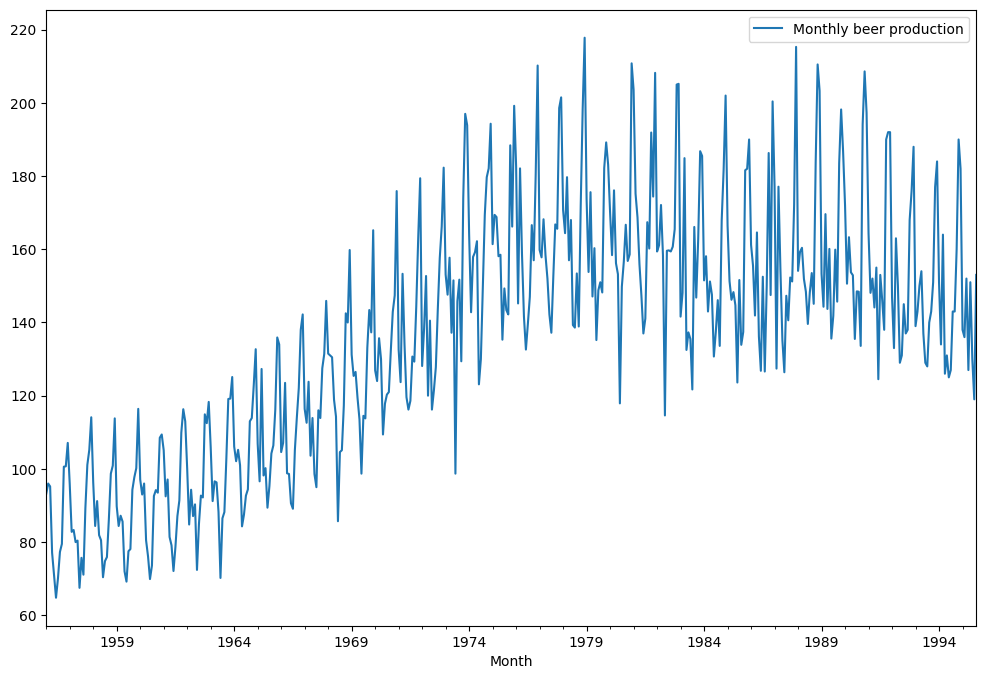

In [ ]:
df.columns = ['Monthly beer production']
df.plot(figsize=(12,8))

##Shifting 1,2,3 Months back

In [ ]:
df['Last_Month'] = df['Monthly beer production'].shift(1)
df['Last_2_Months'] = df['Monthly beer production'].shift(2)
df['Last_3_Months'] = df['Monthly beer production'].shift(3)
df

,Monthly beer production,Last_Month,Last_2_Months,Last_3_Months
Month,,,,
1956-01-01,93.2,NaN,NaN,NaN
1956-02-01,96.0,93.2,NaN,NaN
1956-03-01,95.2,96.0,93.2,NaN
1956-04-01,77.1,95.2,96.0,93.2
1956-05-01,70.9,77.1,95.2,96.0
...,...,...,...,...
1995-04-01,127.0,152.0,136.0,138.0
1995-05-01,151.0,127.0,152.0,136.0
1995-06-01,130.0,151.0,127.0,152.0


In [ ]:
df.dropna(inplace=True)
df

,Monthly beer production,Last_Month,Last_2_Months,Last_3_Months
Month,,,,
1956-04-01,77.1,95.2,96.0,93.2
1956-05-01,70.9,77.1,95.2,96.0
1956-06-01,64.8,70.9,77.1,95.2
1956-07-01,70.1,64.8,70.9,77.1
1956-08-01,77.3,70.1,64.8,70.9
...,...,...,...,...
1995-04-01,127.0,152.0,136.0,138.0
1995-05-01,151.0,127.0,152.0,136.0
1995-06-01,130.0,151.0,127.0,152.0


##Linear Regression & Random Forest for Forecasting

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

## Numpy array - 3 Dataframes

In [ ]:
import numpy as np
x1,x2,x3,y = df['Last_Month'], df['Last_2_Months'], df['Last_3_Months'], df['Monthly beer production']
x1,x2,x3,y = np.array(x1), np.array(x2), np.array(x3), np.array(y)
x1,x2,x3,y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3), axis=1)

print(final_x)

[[ 95.2  96.   93.2]
 [ 77.1  95.2  96. ]
 [ 70.9  77.1  95.2]
 ...
 [151.  127.  152. ]
 [130.  151.  127. ]
 [119.  130.  151. ]]


## Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_x, y, test_size=0.2, random_state=1)

In [ ]:
lin_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train.ravel())

RandomForestRegressor(max_features=3, random_state=1)

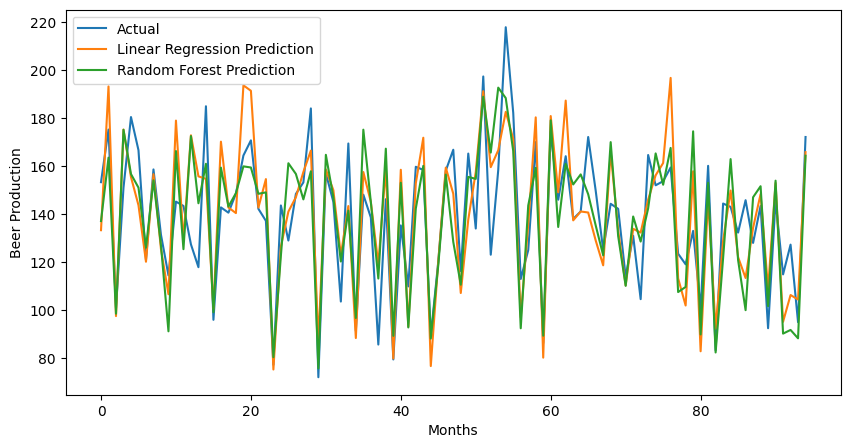

In [ ]:
prediction = lin_model.predict(x_test)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(y_test, label='Actual')
plt.plot(prediction, label='Linear Regression Prediction')
plt.plot(rf_model.predict(x_test), label='Random Forest Prediction')
plt.xlabel('Months')
plt.ylabel('Beer Production')
plt.legend()
plt.show()

## Model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
rmse_rf = sqrt(mean_squared_error(y_test, rf_model.predict(x_test)))
rmse_lin = sqrt(mean_squared_error(y_test, lin_model.predict(x_test)))

print('Random Forest RMSE: ', rmse_rf)
print('Linear Regression RMSE: ', rmse_lin)

Random Forest RMSE:  18.385697749237472
Linear Regression RMSE:  17.784548300262827


## MAPE

Linear Regression MAPE: 10.50%
Random Forest MAPE:   10.79%


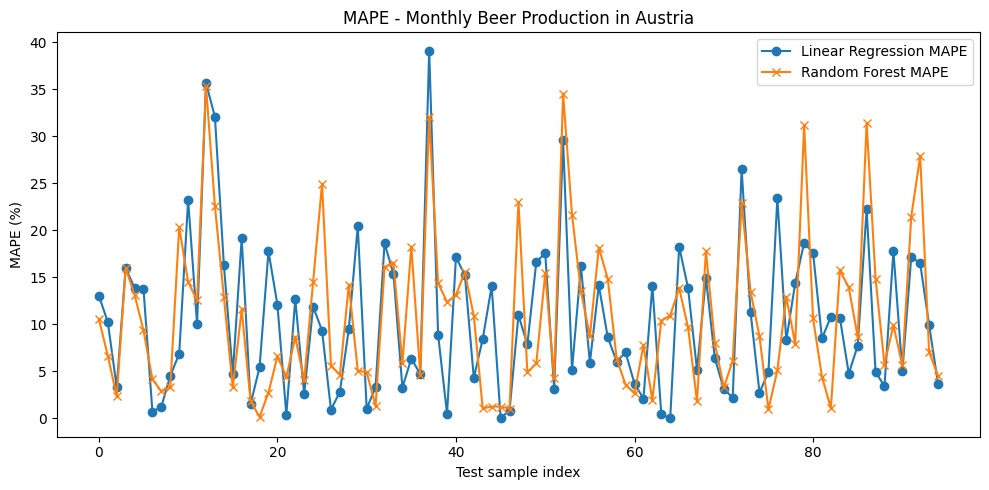

In [ ]:
# 1. Get predictions and true values (flatten to 1-D)
pred_lin = lin_model.predict(x_test).ravel()
pred_rf  = rf_model.predict(x_test).ravel()
y_true   = y_test.ravel()

# 2. Compute per-sample MAPE (%)
mape_lin = np.abs((y_true - pred_lin) / y_true) * 100
mape_rf  = np.abs((y_true - pred_rf)  / y_true) * 100

# 3. Print overall (mean) MAPE
print(f"Linear Regression MAPE: {mape_lin.mean():.2f}%")
print(f"Random Forest MAPE:   {mape_rf.mean():.2f}%")

# 4. Plot MAPE over the test samples
plt.figure(figsize=(10, 5))
plt.plot(mape_lin, marker='o', label='Linear Regression MAPE')
plt.plot(mape_rf,  marker='x', label='Random Forest MAPE')
plt.xlabel('Test sample index')
plt.ylabel('MAPE (%)')
plt.title('MAPE - Monthly Beer Production in Austria')
plt.legend()
plt.tight_layout()
plt.show()